In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
6

In [11]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
imdb_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## In order to make calculations we need to remove $ and , from our numeric values

In [13]:
tn_movies_budgets_comma_fixed = tn_movies_budgets.copy()
tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace('$','')
tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace(',','').astype(int)
tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace('$','')
tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace(',','').astype(int)
tn_movies_budgets_comma_fixed['worldwide_gross'] = tn_movies_budgets_comma_fixed['worldwide_gross'].str.replace('$','')
tn_movies_budgets_comma_fixed['worldwide_gross'] = tn_movies_budgets_comma_fixed['worldwide_gross'].str.replace(',','').astype(float)


C:\Users\01aut\AppData\Local\Temp/ipykernel_8360/258809931.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace('$','')
C:\Users\01aut\AppData\Local\Temp/ipykernel_8360/258809931.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace('$','')
C:\Users\01aut\AppData\Local\Temp/ipykernel_8360/258809931.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* 

In [14]:
tn_movies_budgets_comma_fixed.sort_values('worldwide_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09
...,...,...,...,...,...,...
5474,75,"Dec 31, 2005",Insomnia Manica,500000,0,0.000000e+00
5473,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0.000000e+00
5472,73,"Apr 3, 2012",Enter Nowhere,500000,0,0.000000e+00
5471,72,"Dec 31, 2010",Drones,500000,0,0.000000e+00


## Calculated profit margin percent to see how successful each movie is

In [15]:
tn_movies_budgets_comma_fixed['profit_margin_percent'] = ((tn_movies_budgets_comma_fixed['worldwide_gross']/tn_movies_budgets_comma_fixed['production_budget']) -1)*100

In [16]:
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,-100.000000


In [17]:
tn_movies_budgets_comma_fixed['year'] = tn_movies_budgets_comma_fixed['release_date'].apply(lambda x: x[-4:])
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,-100.000000,2018
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,3908.250000,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,-73.240000,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0.000000e+00,-100.000000,2015


In [18]:
tn_movies_budgets_comma_fixed['name_year'] = tn_movies_budgets_comma_fixed['movie'] + ' ' + tn_movies_budgets_comma_fixed['year']

In [12]:
tn_movies_budgets_comma_fixed.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,name_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009,Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017,Star Wars Ep. VIII: The Last Jedi 2017


In [19]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
imdb_title_basics['name_year'] = imdb_title_basics['primary_title'] + ' ' + imdb_title_basics['start_year'].astype(str)

In [21]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017


In [22]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   name_year        146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


## Set the name_year as indev on both files to merge them on the index.
## We are merging to see the relation btw genres and profit margin percent

In [23]:
imdb_title_basics = imdb_title_basics.set_index('name_year')

In [24]:
tn_movies_budgets_comma_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5782 non-null   int64  
 1   release_date           5782 non-null   object 
 2   movie                  5782 non-null   object 
 3   production_budget      5782 non-null   int32  
 4   domestic_gross         5782 non-null   int32  
 5   worldwide_gross        5782 non-null   float64
 6   profit_margin_percent  5782 non-null   float64
 7   year                   5782 non-null   object 
 8   name_year              5782 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 361.5+ KB


In [25]:
tn_movies_budgets_comma_fixed = tn_movies_budgets_comma_fixed.set_index('name_year')

In [26]:
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year
name_year,,,,,,,,
Avatar 2009,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,553.257713,2009
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015
Star Wars Ep. VIII: The Last Jedi 2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,315.369636,2017
...,...,...,...,...,...,...,...,...
Red 11 2018,78,"Dec 31, 2018",Red 11,7000,0,0.000000e+00,-100.000000,2018
Following 1999,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05,3908.250000,1999
Return to the Land of Wonders 2005,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03,-73.240000,2005


In [27]:
genre_analysis = tn_movies_budgets_comma_fixed.merge(imdb_title_basics, right_on = 'name_year', left_on = 'name_year')

In [28]:
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [29]:
genre_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, Pirates of the Caribbean: On Stranger Tides 2011 to Stories of Our Lives 2014
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1547 non-null   int64  
 1   release_date           1547 non-null   object 
 2   movie                  1547 non-null   object 
 3   production_budget      1547 non-null   int32  
 4   domestic_gross         1547 non-null   int32  
 5   worldwide_gross        1547 non-null   float64
 6   profit_margin_percent  1547 non-null   float64
 7   year                   1547 non-null   object 
 8   tconst                 1547 non-null   object 
 9   primary_title          1547 non-null   object 
 10  original_title         1547 non-null   object 
 11  start_year             1547 non-null   int64  
 12  runtime_minutes        1521 non-null   float64
 13  genres                 1541 non-null   object

In [30]:
genre_analysis['genres'] = genre_analysis['genres'].map(lambda x: str(x).split(','))

In [31]:
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]"
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]"
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]"
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]"
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"[Action, Adventure, Fantasy]"


## We use explode to create new lines for movies more than one genre

In [32]:
genre_analysis_genre = genre_analysis.explode('genres')

## Music and Musical genres seem to be the same

In [33]:
genre_analysis_genre['genres'] = genre_analysis_genre['genres'].map(lambda x: 'Musical' if x == 'Music' else x)
genre_analysis_genre['genres']

name_year
Pirates of the Caribbean: On Stranger Tides 2011       Action
Pirates of the Caribbean: On Stranger Tides 2011    Adventure
Pirates of the Caribbean: On Stranger Tides 2011      Fantasy
Dark Phoenix 2019                                      Action
Dark Phoenix 2019                                   Adventure
                                                      ...    
Dutch Kills 2015                                     Thriller
The Ridges 2011                                         Drama
The Ridges 2011                                        Horror
The Ridges 2011                                      Thriller
Stories of Our Lives 2014                               Drama
Name: genres, Length: 3887, dtype: object

In [34]:
genre_analysis_genre['production_budget_m'] = genre_analysis_genre['production_budget'].map(lambda x: x/1000000)
genre_analysis_genre['domestic_gross_m'] = genre_analysis_genre['domestic_gross'].map(lambda x: x/1000000)
genre_analysis_genre['worldwide_gross_m'] = genre_analysis_genre['worldwide_gross'].map(lambda x: x/1000000)

In [35]:
genre_analysis_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m
name_year,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,410.6,241.063875,1045.663875
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,350.0,42.762350,149.762350
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure,350.0,42.762350,149.762350


## Most successfull movies based on profitability

In [36]:
a = genre_analysis_genre.groupby('genres')['worldwide_gross'].sum().sort_values(ascending = False)
b = genre_analysis_genre.groupby('genres')['production_budget'].sum().sort_values(ascending = False)
(((a/b)-1)*100).sort_values(ascending = False, )

genres
Musical        344.904496
Animation      283.762651
Horror         273.572512
Sci-Fi         265.524775
Mystery        254.346757
Thriller       247.013279
Comedy         229.714013
Adventure      228.420088
Biography      211.624600
Romance        204.376690
Action         201.255946
Fantasy        187.154465
Family         186.977772
Documentary    171.964562
Drama          169.381279
Crime          149.161576
History        136.620548
Sport          113.914539
War            104.431061
Western         82.210885
nan             33.676478
Reality-TV    -100.000000
dtype: float64

## This shows how profitable the movie market is

In [37]:
a = genre_analysis_genre['worldwide_gross'].sum()
b = genre_analysis_genre['production_budget'].sum()
(a/b)-1

2.1558848404014745

## First glance at the most successful genres in the box office

In [38]:
genre_analysis_genre.groupby('genres')['worldwide_gross_m'].mean().sort_values(ascending = False)

genres
Animation      373.510168
Adventure      348.357792
Sci-Fi         342.937799
Fantasy        244.584974
Action         236.756048
Family         191.255581
Comedy         132.518192
Thriller       112.085094
Musical        111.103775
Western        104.655307
Mystery         88.541639
History         85.627061
Biography       80.803566
Crime           80.151038
Drama           71.911147
Horror          68.983606
Romance         67.494162
War             57.781838
Sport           51.520373
Documentary     39.049478
nan             36.989396
Reality-TV       0.000000
Name: worldwide_gross_m, dtype: float64

## Comparing the production budgets of 50 top movies and all movies in the database

In [39]:
action_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Action']

In [40]:
action_movies['production_budget_m'].head(50).mean()

222.12400000000002

In [41]:
adventure_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Adventure']

In [42]:
adventure_movies['production_budget_m'].head(50).mean()

228.21400000000003

In [43]:
horror_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Horror']

In [44]:
horror_movies['production_budget_m'].head(50).mean()

51.256

In [45]:
mystery_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Mystery']

In [46]:
mystery_movies['production_budget_m'].head(50).mean()

52.02

In [47]:
genre_analysis_genre.groupby('genres')['production_budget_m'].mean().sort_values(ascending = False)

genres
Adventure      106.070793
Animation       97.328431
Sci-Fi          93.820672
Fantasy         85.175403
Action          78.589668
Family          66.644737
Western         57.436364
Comedy          40.191859
History         36.187500
Thriller        32.299944
Crime           32.168298
War             28.264706
nan             27.670833
Drama           26.694931
Biography       25.929778
Mystery         24.987286
Musical         24.972500
Sport           24.084559
Romance         22.174550
Horror          18.465921
Documentary     14.358296
Reality-TV       1.000000
Name: production_budget_m, dtype: float64

## Create a name_year column for bom movie gross dataframe to merge it. We need this dataframe because it has the studio column

In [48]:
bom_movie_gross['name_year'] = bom_movie_gross['title'] + ' ' + bom_movie_gross['year'].map(lambda x: str(x))

In [49]:
genre_analysis_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m
name_year,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,410.6,241.063875,1045.663875
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,350.0,42.762350,149.762350
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure,350.0,42.762350,149.762350


In [50]:
genre_analysis_studio = genre_analysis_genre.merge(bom_movie_gross, how = 'inner', on = 'name_year')

In [51]:
genre_analysis_studio.head()

,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_margin_percent,year_x,tconst,...,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m,title,studio,domestic_gross_y,foreign_gross,year_y
0,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,136.0,Action,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,136.0,Adventure,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
2,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,136.0,Fantasy,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
3,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,141.0,Action,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
4,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,141.0,Adventure,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


## How many studios for each genre? In other words how fierce is the competition?

In [52]:
genre_analysis_studio.groupby('genres')['studio'].count().sort_values(ascending = False)

genres
Drama          510
Comedy         388
Action         327
Adventure      278
Thriller       182
Crime          161
Romance        142
Horror         107
Biography      105
Sci-Fi          96
Fantasy         88
Animation       84
Mystery         81
Family          66
Musical         37
History         30
Sport           21
Documentary     17
War              7
Western          6
nan              1
Name: studio, dtype: int64

In [53]:
genre_analysis_studio['month'] = genre_analysis_studio['release_date'].map(lambda x : x[:3])

In [54]:
import datetime
import seaborn as sns

In [55]:
genre_analysis_studio.head()

,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_margin_percent,year_x,tconst,...,genres,production_budget_m,domestic_gross_m,worldwide_gross_m,title,studio,domestic_gross_y,foreign_gross,year_y,month
0,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,Action,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
1,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,Adventure,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
2,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,...,Fantasy,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
3,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,Action,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,May
4,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,...,Adventure,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,May


## A closer look to monthly success of the 3 studios that has the best potential for microsoft to choose when enterin movie studio business.

In [56]:
genre_analysis_studio_mystery = genre_analysis_studio[genre_analysis_studio['genres'] == 'Mystery']
genre_analysis_studio_horror = genre_analysis_studio[genre_analysis_studio['genres'] == 'Horror']
genre_analysis_studio_musical = genre_analysis_studio[genre_analysis_studio['genres'] == 'Musical']


In [57]:
import matplotlib.pyplot as plt
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


(0.0, 800.0)

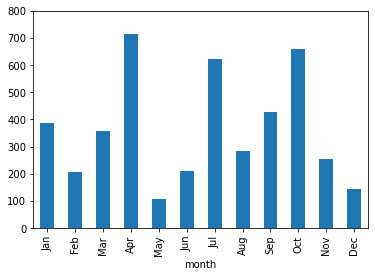

In [58]:
horror_average_profit_percent_monthly = ((genre_analysis_studio_horror.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_horror.groupby('month')['production_budget'].sum())-1)*100
#horror_average_profit_percent_monthly.plot.bar()
df = pd.DataFrame(horror_average_profit_percent_monthly)
df = df.reset_index()
#fig, ax = plt.subplots()
#ax.bar(horror_average_profit_percent_monthly.index, horror_average_profit_percent_monthly.values)
ax = df.set_index("month").loc[month_order].plot(kind="bar", legend=False)
ax.set_ylim(0,800)

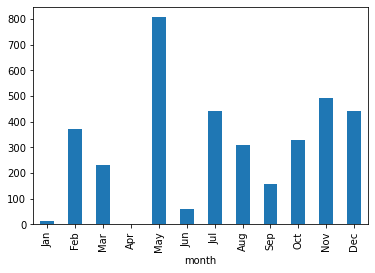

In [59]:
musical_average_profit_percent_monthly = ((genre_analysis_studio_musical.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_musical.groupby('month')['production_budget'].sum())-1)*100
musical_average_profit_percent_monthly['Apr'] = 0
df2 = pd.DataFrame(musical_average_profit_percent_monthly)
df2 = df2.reset_index()
ax = df2.set_index("month").loc[month_order].plot(kind="bar", legend=False)

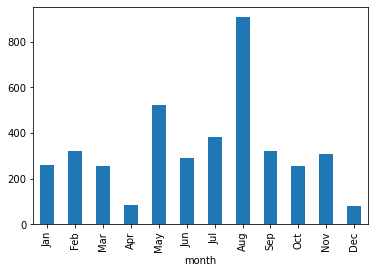

In [60]:
mystery_average_profit_percent_monthly = ((genre_analysis_studio_mystery.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_mystery.groupby('month')['production_budget'].sum())-1)*100
df3 = pd.DataFrame(mystery_average_profit_percent_monthly)
df3 = df3.reset_index()
ax = df3.set_index("month").loc[month_order].plot(kind="bar", legend=False)


## How does a movies success rate change as the budget increases

<AxesSubplot:xlabel='production_budget_m', ylabel='profit_margin_percent'>

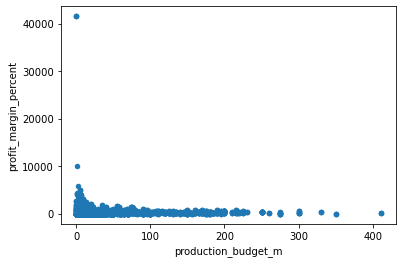

In [61]:
genre_analysis_genre.plot.scatter('production_budget_m','profit_margin_percent')

In [62]:
genre_analysis['budget_group'] = genre_analysis['production_budget'].map(lambda x: (x/1000000)//50)
dict = {0:'0-49', 1:'050-99', 2:'100-149', 3:'150-199', 4:'200-249', 5:'250-299', 6:'300-349', 7:'350-399', 8:'400+'}
genre_analysis['budget_group'] = genre_analysis['budget_group'].map(dict)
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,budget_group
name_year,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]",400+
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]",350-399
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",300-349
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",300-349
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"[Action, Adventure, Fantasy]",300-349


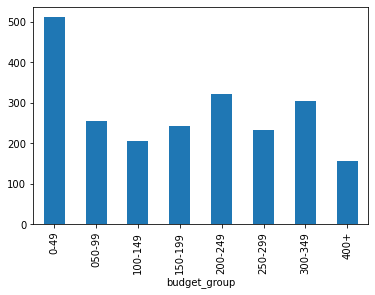

In [66]:
budget_analysis = genre_analysis.groupby('budget_group')['profit_margin_percent'].mean()
budget_analysis.plot.bar();

In [64]:
genre_analysis = genre_analysis[genre_analysis['profit_margin_percent'] > (0)]

<AxesSubplot:xlabel='budget_group'>

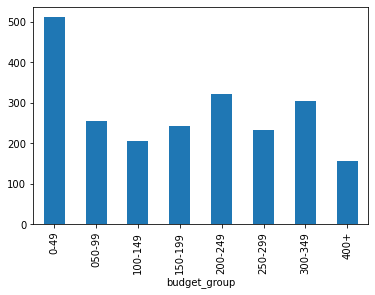

In [65]:
budget_analysis = genre_analysis.groupby('budget_group')['profit_margin_percent'].mean()
budget_analysis.plot.bar()

## Exploring Genre and Budget

In [108]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [109]:
title_basic = pd.read_csv('data/title.basics.csv')

In [110]:
#Importing Data for Title_Basic
title_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [111]:
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [112]:
#Importing movie budgets data
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [113]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [114]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [115]:
#Creating new column called "pb_numeric" for production_budget and droping dollar signs and commas
movie_budgets['pb_numeric'] = pd.to_numeric(movie_budgets["production_budget"].str.replace('[^0-9]',''))
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,1400


In [116]:
#Creating new column called "wwg_numeric" for worldwide_gross and droping dollar signs and commas
movie_budgets['wwg_numeric'] = pd.to_numeric(movie_budgets['worldwide_gross'].str.replace('[^0-9]',''))
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,7000,0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,1400,0


In [117]:
#replacing original release date with month, day, and year with JUST the year. 
movie_budgets["Profit"] = movie_budgets["wwg_numeric"] - movie_budgets["pb_numeric"]
movie_budgets["release_date"].apply(lambda x: int(x[-4:]))
movie_budgets["release_date"] = movie_budgets["release_date"].apply(lambda x: int(x[-4:]))
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit
0,1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,635063875
2,3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350,-200237650
3,4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963,1072413963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,2018,Red 11,"$7,000",$0,$0,7000,0,-7000
5778,79,1999,Following,"$6,000","$48,482","$240,495",6000,240495,234495
5779,80,2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338,-3662
5780,81,2015,A Plague So Pleasant,"$1,400",$0,$0,1400,0,-1400


In [120]:
#sorted the Profit column from largest to smallest
sorted_df = movie_budgets.sort_values(by="Profit", ascending=False)
sorted_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit
0,1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
42,43,1997,Titanic,"$200,000,000","$659,363,944","$2,208,208,395",200000000,2208208395,2008208395
6,7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200
5,6,2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000,2053311220,1747311220
33,34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864
...,...,...,...,...,...,...,...,...,...
352,53,2001,Town & Country,"$105,000,000","$6,712,451","$10,364,769",105000000,10364769,-94635231
341,42,2019,Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",110000000,3100000,-106900000
193,94,2011,Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242
194,95,2020,Moonfall,"$150,000,000",$0,$0,150000000,0,-150000000


In [121]:
#merging title basic and movie budgets dataframe to genre_budgets
genre_budgets = title_basic.merge(movie_budgets, left_on = ["primary_title", "start_year"], right_on = ["movie", "release_date"])

In [122]:
genre_budgets

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012,Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,2013,The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",91000000,187861183,96861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,2014,A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",28000000,62108587,34108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,2011,The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",45000000,21544732,-23455268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",16,2019,Crawl,"$17,000,000",$0,$0,17000000,0,-17000000
1543,tt8408152,Detention,Detention,2012,NaN,Horror,45,2012,Detention,"$10,000,000",$0,$0,10000000,0,-10000000
1544,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,2018,Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",5000000,6653715,1653715
1545,tt8852552,Icarus,Icarus,2010,78.0,Thriller,91,2010,Icarus,"$6,000,000",$0,$0,6000000,0,-6000000


In [77]:
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1547 non-null   object 
 1   primary_title      1547 non-null   object 
 2   original_title     1547 non-null   object 
 3   start_year         1547 non-null   int64  
 4   runtime_minutes    1521 non-null   float64
 5   genres             1541 non-null   object 
 6   id                 1547 non-null   int64  
 7   release_date       1547 non-null   int64  
 8   movie              1547 non-null   object 
 9   production_budget  1547 non-null   object 
 10  domestic_gross     1547 non-null   object 
 11  worldwide_gross    1547 non-null   object 
 12  pb_numeric         1547 non-null   int64  
 13  wwg_numeric        1547 non-null   int64  
 14  Profit             1547 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 193.4+ KB


In [78]:
#dropping NA values
genre_budgets_cleaned = genre_budgets.dropna()

In [79]:
genre_budgets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1546
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1519 non-null   object 
 1   primary_title      1519 non-null   object 
 2   original_title     1519 non-null   object 
 3   start_year         1519 non-null   int64  
 4   runtime_minutes    1519 non-null   float64
 5   genres             1519 non-null   object 
 6   id                 1519 non-null   int64  
 7   release_date       1519 non-null   int64  
 8   movie              1519 non-null   object 
 9   production_budget  1519 non-null   object 
 10  domestic_gross     1519 non-null   object 
 11  worldwide_gross    1519 non-null   object 
 12  pb_numeric         1519 non-null   int64  
 13  wwg_numeric        1519 non-null   int64  
 14  Profit             1519 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 189.9+ KB


In [80]:
#sorted by Profits column, largest to smallest
genre_budgets_cleaned = genre_budgets_cleaned.sort_values(by="Profit", ascending=False)
genre_budgets_cleaned

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864
1110,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,2015,Furious 7,"$190,000,000","$353,007,020","$1,518,722,794",190000000,1518722794,1328722794
82,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,2012,The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225000000,1517935897,1292935897
731,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,2018,Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",200000000,1348258224,1148258224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,tt7232438,The Promise,Puen Tee Raluek,2017,114.0,"Drama,Horror,Thriller",78,2017,The Promise,"$90,000,000","$8,224,288","$10,551,417",90000000,10551417,-79448583
1455,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",80,2017,Bright,"$90,000,000",$0,$0,90000000,0,-90000000
955,tt2283336,Men in Black: International,Men in Black: International,2019,115.0,"Action,Adventure,Comedy",42,2019,Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",110000000,3100000,-106900000
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242


In [82]:
#adding profit percentage column, calculating profit %
genre_budgets_cleaned["profit_percentage"]= ((genre_budgets_cleaned["wwg_numeric"] / genre_budgets_cleaned["pb_numeric"]) -1 )* 100
genre_budgets_cleaned

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit,profit_percentage
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200,582.711400
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864,666.909239
1110,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,2015,Furious 7,"$190,000,000","$353,007,020","$1,518,722,794",190000000,1518722794,1328722794,699.327786
82,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,2012,The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225000000,1517935897,1292935897,574.638176
731,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,2018,Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",200000000,1348258224,1148258224,574.129112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,tt7232438,The Promise,Puen Tee Raluek,2017,114.0,"Drama,Horror,Thriller",78,2017,The Promise,"$90,000,000","$8,224,288","$10,551,417",90000000,10551417,-79448583,-88.276203
1455,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",80,2017,Bright,"$90,000,000",$0,$0,90000000,0,-90000000,-100.000000
955,tt2283336,Men in Black: International,Men in Black: International,2019,115.0,"Action,Adventure,Comedy",42,2019,Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",110000000,3100000,-106900000,-97.181818
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242,-73.633495


In [83]:
#sorting by profit_percentage column, largest to smallest
genre_budgets_cleaned.sort_values(by="profit_percentage", ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit,profit_percentage
969,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",80,2015,The Gallows,"$100,000","$22,764,410","$41,656,474",100000,41656474,41556474,41556.474000
502,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,12,2012,The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",1000000,101759490,100759490,10075.949000
485,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,65,2010,Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032",3000000,177512032,174512032,5817.067733
1431,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",49,2017,Get Out,"$5,000,000","$176,040,665","$255,367,951",5000000,255367951,250367951,5007.359020
1423,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,64,2016,Moonlight,"$1,500,000","$27,854,931","$65,245,512",1500000,65245512,63745512,4249.700800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,tt3513086,40 Weeks,40 Weeks,2014,111.0,Documentary,45,2014,40 Weeks,"$900,000",$0,$0,900000,0,-900000,-100.000000
836,tt2016335,Walter,Walter,2015,94.0,"Comedy,Drama",96,2015,Walter,"$700,000",$0,$0,700000,0,-700000,-100.000000
715,tt1799508,After,After,2012,90.0,"Drama,Fantasy,Mystery",2,2012,After,"$650,000",$0,$0,650000,0,-650000,-100.000000
716,tt2404163,After,After,2012,83.0,Romance,2,2012,After,"$650,000",$0,$0,650000,0,-650000,-100.000000


In [84]:
#turning genres_list to a list and creating new column called genres
gbc2 = genre_budgets_cleaned.copy()
gbc2['genres_list'] = gbc2['genres'].str.split(',')
#genre_budgets_cleaned.explode("genres")
gbc2


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit,profit_percentage,genres_list
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200,582.711400,"[Action, Adventure, Sci-Fi]"
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864,666.909239,"[Action, Adventure, Sci-Fi]"
1110,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,2015,Furious 7,"$190,000,000","$353,007,020","$1,518,722,794",190000000,1518722794,1328722794,699.327786,"[Action, Crime, Thriller]"
82,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,2012,The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225000000,1517935897,1292935897,574.638176,"[Action, Adventure, Sci-Fi]"
731,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,2018,Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",200000000,1348258224,1148258224,574.129112,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,tt7232438,The Promise,Puen Tee Raluek,2017,114.0,"Drama,Horror,Thriller",78,2017,The Promise,"$90,000,000","$8,224,288","$10,551,417",90000000,10551417,-79448583,-88.276203,"[Drama, Horror, Thriller]"
1455,tt5519340,Bright,Bright,2017,117.0,"Action,Crime,Fantasy",80,2017,Bright,"$90,000,000",$0,$0,90000000,0,-90000000,-100.000000,"[Action, Crime, Fantasy]"
955,tt2283336,Men in Black: International,Men in Black: International,2019,115.0,"Action,Adventure,Comedy",42,2019,Men in Black: International,"$110,000,000","$3,100,000","$3,100,000",110000000,3100000,-106900000,-97.181818,"[Action, Adventure, Comedy]"
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242,-73.633495,"[Adventure, Animation, Family]"


In [85]:
#exploding data to separate genres
budgets_genres = gbc2.explode("genres_list")
budgets_genres.sort_values(by="profit_percentage", ascending=False)
budgets_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit,profit_percentage,genres_list
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200,582.711400,Action
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200,582.711400,Adventure
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,2048134200,1748134200,582.711400,Sci-Fi
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864,666.909239,Action
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864,666.909239,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242,-73.633495,Animation
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,"$150,000,000","$21,392,758","$39,549,758",150000000,39549758,-110450242,-73.633495,Family
1504,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350,-200237650,-57.210757,Action
1504,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350,-200237650,-57.210757,Adventure


In [86]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
#grouping by genre and profit percentage to see what is highest
genre_analysis = budgets_genres.groupby('genres_list')['profit_percentage'].mean().sort_values(ascending = False)
genre_analysis


genres_list
Mystery        869.924839
Horror         781.836592
Thriller       515.391089
Animation      267.441904
Romance        265.562923
Sci-Fi         260.843431
Musical        239.466372
Biography      238.162073
Comedy         215.196827
Drama          215.177743
Fantasy        214.292150
Adventure      208.431154
Documentary    193.522872
Action         159.998854
History        154.924390
Family         154.583012
Crime          114.987295
Sport          109.987502
Western         53.448234
War             41.110865
Reality-TV    -100.000000
Name: profit_percentage, dtype: float64

In [131]:
#dividing data set by 1 million to shorten values to million and getting rid of the 1E message
budgets_genres['production_budget'] = budgets_genres['pb_numeric'].map(lambda x: x/1000000)
budgets_genres['worldwide_gross'] = budgets_genres['wwg_numeric'].map(lambda x: x/1000000)
budgets_genres["genres_list"].value_counts()

Drama          735
Comedy         515
Action         448
Adventure      350
Thriller       266
Crime          234
Romance        188
Horror         184
Biography      135
Sci-Fi         134
Mystery        126
Fantasy        124
Animation      101
Family          93
Musical         60
Documentary     49
History         39
Sport           34
War             17
Western         11
Reality-TV       1
Name: genres_list, dtype: int64

In [103]:
#starting new data frame to combine values for musical and music
new_budget_genres = budgets_genres
new_budget_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit,profit_percentage,genres_list
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,300.0,"$678,815,482",2048.134200,300000000,2048134200,1748134200,582.711400,Action
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,300.0,"$678,815,482",2048.134200,300000000,2048134200,1748134200,582.711400,Adventure
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,300.0,"$678,815,482",2048.134200,300000000,2048134200,1748134200,582.711400,Sci-Fi
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,215.0,"$652,270,625",1648.854864,215000000,1648854864,1433854864,666.909239,Action
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,215.0,"$652,270,625",1648.854864,215000000,1648854864,1433854864,666.909239,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,150.0,"$21,392,758",39.549758,150000000,39549758,-110450242,-73.633495,Animation
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,150.0,"$21,392,758",39.549758,150000000,39549758,-110450242,-73.633495,Family
1504,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",3,2019,Dark Phoenix,350.0,"$42,762,350",149.762350,350000000,149762350,-200237650,-57.210757,Action
1504,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",3,2019,Dark Phoenix,350.0,"$42,762,350",149.762350,350000000,149762350,-200237650,-57.210757,Adventure


In [105]:

new_budget_genres["genres_list"].value_counts()

Drama          735
Comedy         515
Action         448
Adventure      350
Thriller       266
Crime          234
Romance        188
Horror         184
Biography      135
Sci-Fi         134
Mystery        126
Fantasy        124
Animation      101
Family          93
Musical         60
Documentary     49
History         39
Sport           34
War             17
Western         11
Reality-TV       1
Name: genres_list, dtype: int64

In [132]:
new_budget_genres["genres_list"] = new_budget_genres["genres_list"].replace(["Music"],["Musical"])
new_budget_genres



,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,pb_numeric,wwg_numeric,Profit,profit_percentage,genres_list
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,300.0,"$678,815,482",2048.134200,300000000,2048134200,1748134200,582.711400,Action
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,300.0,"$678,815,482",2048.134200,300000000,2048134200,1748134200,582.711400,Adventure
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,2018,Avengers: Infinity War,300.0,"$678,815,482",2048.134200,300000000,2048134200,1748134200,582.711400,Sci-Fi
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,215.0,"$652,270,625",1648.854864,215000000,1648854864,1433854864,666.909239,Action
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,215.0,"$652,270,625",1648.854864,215000000,1648854864,1433854864,666.909239,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,150.0,"$21,392,758",39.549758,150000000,39549758,-110450242,-73.633495,Animation
310,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88.0,"Adventure,Animation,Family",94,2011,Mars Needs Moms,150.0,"$21,392,758",39.549758,150000000,39549758,-110450242,-73.633495,Family
1504,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",3,2019,Dark Phoenix,350.0,"$42,762,350",149.762350,350000000,149762350,-200237650,-57.210757,Action
1504,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",3,2019,Dark Phoenix,350.0,"$42,762,350",149.762350,350000000,149762350,-200237650,-57.210757,Adventure


In [133]:
#grouping by genre and production budget
budgets_genres.groupby('genres_list')['production_budget'].mean().sort_values(ascending = False)

genres_list
Adventure      106.601257
Animation       97.480198
Sci-Fi          93.820672
Fantasy         85.175403
Action          78.942031
Family          67.188172
Western         57.436364
Comedy          40.259854
History         35.589744
Thriller        32.290921
Crime           32.177564
War             28.264706
Drama           26.455284
Biography       25.929778
Musical         24.972500
Mystery         24.591846
Sport           24.084559
Romance         22.291835
Horror          18.560474
Documentary     13.925469
Reality-TV       1.000000
Name: production_budget, dtype: float64

In [134]:
#grouping by genre and worldwide gross
budgets_genres.groupby('genres_list')['worldwide_gross'].mean().sort_values(ascending = False)

genres_list
Animation      377.208289
Adventure      351.343715
Sci-Fi         342.937799
Fantasy        244.584974
Action         238.868602
Family         195.368599
Comedy         133.525806
Thriller       112.927839
Musical        111.103775
Western        104.655307
Mystery         89.947062
History         87.822627
Biography       80.803566
Crime           80.491000
Drama           72.541941
Horror          70.108339
Romance         67.853174
War             57.781838
Sport           51.520373
Documentary     41.779067
Reality-TV       0.000000
Name: worldwide_gross, dtype: float64

Text(0, 0.5, 'Profit %')

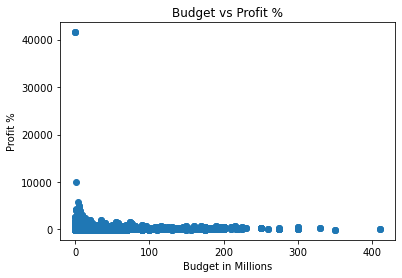

In [138]:
fig, ax = plt.subplots()

ax.scatter(x= budgets_genres["production_budget"], y= budgets_genres["profit_percentage"])
ax.set_title("Budget vs Profit %")
ax.set_xlabel("Budget in Millions")
ax.set_ylabel("Profit %")

In [139]:
gbc3 = gbc2.sort_values("profit_percentage", ascending = False).iloc[1:]
gbc3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518 entries, 502 to 741
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1518 non-null   object 
 1   primary_title      1518 non-null   object 
 2   original_title     1518 non-null   object 
 3   start_year         1518 non-null   int64  
 4   runtime_minutes    1518 non-null   float64
 5   genres             1518 non-null   object 
 6   id                 1518 non-null   int64  
 7   release_date       1518 non-null   int64  
 8   movie              1518 non-null   object 
 9   production_budget  1518 non-null   object 
 10  domestic_gross     1518 non-null   object 
 11  worldwide_gross    1518 non-null   object 
 12  pb_numeric         1518 non-null   int64  
 13  wwg_numeric        1518 non-null   int64  
 14  Profit             1518 non-null   int64  
 15  profit_percentage  1518 non-null   float64
 16  genres_list        1518

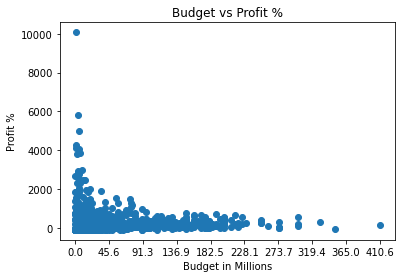

In [140]:
#comparing budget vs profit%
import numpy as np

fig, ax = plt.subplots()

ax.scatter(x= gbc3["pb_numeric"].map(lambda x: x/1000000), y= gbc3["profit_percentage"])
ax.set_title("Budget vs Profit %")
ax.set_xlabel("Budget in Millions")
ax.set_ylabel("Profit %")

xticks = np.linspace(
                    start=min(list(gbc3["pb_numeric"].map(lambda x: x/1000000))),
                    stop=max(list(gbc3["pb_numeric"].map(lambda x: x/1000000))),
                    num=10
                    )
ax.set_xticks(xticks)


# ax.set_xticks(gbc3["production_budget"],[1000,2000,3000])

###### LIST OF FILES
### PRIORITIES 
>title.basics**.csv** <br>
>title.ratings**.csv** <br>
>bom.movie_gross**.csv** <br>
### SECONDARIES
>name.basics**.csv** <br>
>title.akas**.csv** <br>
>title.crew**.csv** <br>
>title.principals**.csv** <br>
>tmdbs.movies**.csv** <br>
>tn.movie_budgets**.csv** <br>
>rt.movie_info**.tsv** <br>
>rt.reviews**.tsv** <br>

### Import Necessary libraries for EDA

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show(sns)
import numpy as np
from collections import Counter
from scipy.stats import gaussian_kde
%matplotlib inline

In [86]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')

#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')

#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')

#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')

# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

## Data Cleaning for financial figures
>**tv_movies_budgets.csv** <br>
Our main focus we'll be measuring profit against budget and analyse any possible correlations. To form profit, we need revenue and cost values. As such, the only suitable table to achieve this is tv_movies_budgets.csv

In [87]:
# First we much check to see if there are any missing values. Thankfully there are non.
# But we do see there are issues with the datatypes. 
#     Both gross figures and budget figures are objects but they need to either be int or float
#     The release date should also either be in datetime or int
tn_movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [88]:
# Problems:
#    The financial figures should be stripped of the dollar sign and the commas and then converted to integers
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [89]:
# We run this code to achieve the desired formatting for the financial figures on each coloumn needed

tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].astype(int)

tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].astype(int)

tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x.replace(',', ''))
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x.replace('$', ''))
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].astype(int)

In [90]:
# We should be wary that, whilst there are no null values, there may be '0' values
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [91]:
# We shall search for a count of these '0' values if they exist
production_budget_0_count = (tn_movies_budgets['production_budget'] == 0).sum()
domestic_gross_0_count = (tn_movies_budgets['domestic_gross'] == 0).sum()
worldwide_gross_0_count = (tn_movies_budgets['worldwide_gross'] == 0).sum()

print(f'production_budget_0_count: {production_budget_0_count}')
print(f'domestic_gross_0_count: {domestic_gross_0_count}')
print(f'worldwide_gross_count_0: {worldwide_gross_0_count}')

# We can see there are hundreds of values missing in the domestic and gross count.
# These are essentially null values and need to be dealt with before analysis

production_budget_0_count: 0
domestic_gross_0_count: 548
worldwide_gross_count_0: 367


In [92]:
# When dealing with null values, we can use the mean, median or drop the rows
# Dropping rows is the last resort as preservation of data is important 

domestic_gross_mean = tn_movies_budgets['domestic_gross'].mean()
worldwide_gross_mean = tn_movies_budgets['worldwide_gross'].mean()

domestic_gross_median = tn_movies_budgets['domestic_gross'].median()
worldwide_gross_median = tn_movies_budgets['worldwide_gross'].median()
                        
print(f'domestic_gross_mean: {domestic_gross_mean} | domestic_gross_median: {domestic_gross_median}')
print(f'worldwide_gross_mean: {worldwide_gross_mean} | worldwide_gross_median: {worldwide_gross_median}')

# As we see, the median is substatially lower than the mean. 

domestic_gross_mean: 41873326.867001034 | domestic_gross_median: 17225945.0
worldwide_gross_mean: 91487460.90643376 | worldwide_gross_median: 27984448.5


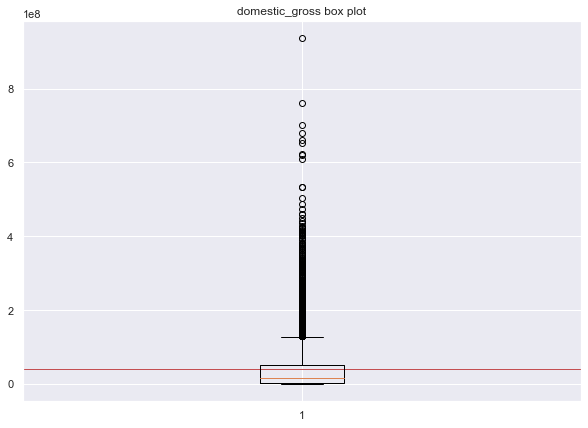

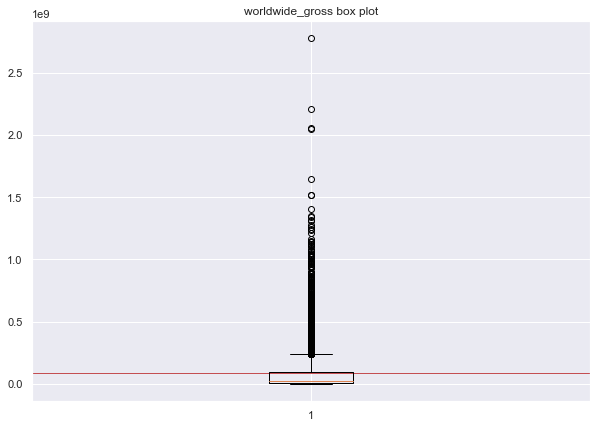

In [93]:
fig, ax = plt.subplots(figsize=(10,7))
ax.axhline(y=domestic_gross_mean, linewidth=1, color='r')
plt.boxplot(tn_movies_budgets['domestic_gross'])
ax.set_title('domestic_gross box plot')
plt.show();

fig, ax = plt.subplots(figsize=(10,7))
ax.axhline(y=worldwide_gross_mean, linewidth=1, color='r')
plt.boxplot(tn_movies_budgets['worldwide_gross'])
ax.set_title('worldwide_gross box plot');

# From the boxplot, in both cases that there are many points beyond the 75th percentile. There is even an outlier.
# Because of this, the mean (red line) is heavily skewed. 
# To mitigate this, the median (orange line) should be prioritised.

In [94]:
# We will replace each 0 value from the domestic_gross and worldwide_gross with their respective medians
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: domestic_gross_median if x==0 else x)
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: worldwide_gross_median if x==0 else x)
                                                                            

In [95]:
# We shall turn the relase_date into a categorical variable by stripping out the years and months into separate columns
tn_movies_budgets['release_month'] = tn_movies_budgets['release_date'].apply(lambda x: x[0:3])
tn_movies_budgets['release_year'] = tn_movies_budgets['release_date'].apply(lambda x: int(x[-4:]))


In [96]:
# Now that the financial figures are numerical, we can create new columns based on simple calculations 
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(lambda x: x/1000000)
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(lambda x: x/1000000)
tn_movies_budgets['worldwide_gross'] = tn_movies_budgets['worldwide_gross'].apply(lambda x: x/1000000)


In [97]:
# We should be careful not to claim that "gross"-'budget' = 'profit' as there may be other costs outside of production cost
# To be safe, we shall call the new column production_return

tn_movies_budgets['production_return'] = tn_movies_budgets['worldwide_gross'] - tn_movies_budgets['production_budget']

# With this calculation, we shall standardise the production return values by expressing them as a percentage of the budget
tn_movies_budgets['% production_return'] = tn_movies_budgets['production_return'] / tn_movies_budgets['worldwide_gross']

## Change in financial figures over the years chart
We shall visualise our results by examining the average budget, profit and revenue per year.

In [98]:
# This will retrieve the average financial figures over the past 10 years
monthly_mean_budget_last_10_years = tn_movies_budgets[tn_movies_budgets['release_year'] >= 2011].groupby(by=['release_month'])['production_budget'].mean()


In [99]:
imdb_title_basics = pd.read_csv('data/title.basics.csv')

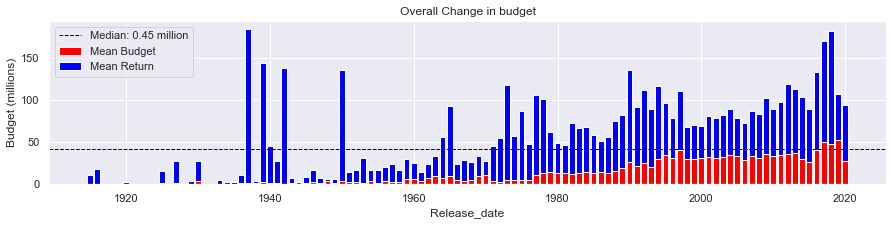

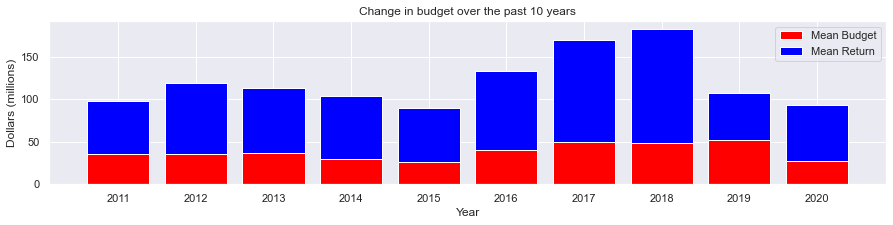

In [100]:
yearly_mean_budget = tn_movies_budgets.groupby(by=['release_year'])['production_budget'].mean()
yearly_mean_return = tn_movies_budgets.groupby(by=['release_year'])['production_return'].mean()

fig, ax = plt.subplots(figsize=(15,3))

plt.bar(
       list(yearly_mean_budget.keys()), 
       list(yearly_mean_budget),
       color = 'red',
       label = 'Mean Budget'
       )

plt.bar(
       list(yearly_mean_return.keys()), 
       list(yearly_mean_return),
       color = 'blue',
       label = 'Mean Return',
       bottom = yearly_mean_budget
       )
plt.axhline(np.median(yearly_mean_return), linewidth=1, ls='--' ,color='black', label='Median: 0.45 million')

ax.legend()
ax.set_title('Overall Change in budget')
ax.set_xlabel('Release_date')
ax.set_ylabel('Budget (millions)')


yearly_mean_budget_bar, ax = plt.subplots(figsize=(15,3))

plt.bar(
       list(yearly_mean_budget.keys())[-10:], 
       list(yearly_mean_budget)[-10:],
       color = 'red',
       label = 'Mean Budget'
       )

plt.bar(
       list(yearly_mean_return.keys())[-10:], 
       list(yearly_mean_return)[-10:],
       bottom=list(yearly_mean_budget)[-10:],
       color = 'blue',
       label = 'Mean Return',
       )


xticks = np.linspace(
                    start=min(list(yearly_mean_return.keys())[-10:]),
                    stop=max(list(yearly_mean_return.keys())[-10:]),
                    num=10
                    )

ax.legend()
ax.set_title('Change in budget over the past 10 years')
ax.set_xlabel('Year')
ax.set_ylabel('Dollars (millions)')
ax.set_xticks(xticks);

## Analysing correlation between ratings & profit

#### Preliminary merging and data cleaning

In [101]:
# Retrieve a fresh copy of 2 relevant files
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [102]:
# Drop missing rows
imdb_title_crew.dropna(axis=0, subset=['directors'], inplace=True)

In [103]:
# Strip the codes of directors and make a list of them
imdb_title_crew['directors'] = imdb_title_crew['directors'].apply(lambda x: list(str(x).split(',')))

# explode the known for titles
imdb_title_crew = imdb_title_crew.explode('directors')

# rename the directors column to tconst
imdb_title_crew.rename(columns={'directors': 'nconst'}, inplace=True)

In [104]:
# Strip the codes of genres and make a list of them
imdb_title_basics['genres'] = imdb_title_basics['genres'].apply(lambda x: list(str(x).split(',')))
imdb_title_basics = imdb_title_basics.explode('genres')

In [105]:
# before the merge, we should standardise the titles in case there are slight errors between the two tables 
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].apply(lambda x: (x.replace(',','')).lower())
tn_movies_budgets['movie'] = tn_movies_budgets['movie'].apply(lambda x: (x.replace(',','')).lower())

In [106]:
# Merge crew and title_basics to get information on directors and the genres they made
crew_title_basics = imdb_title_crew.merge(imdb_title_basics, left_on=['tconst'], right_on=['tconst'])

In [107]:
# Merge crew_title_basics with ratings to include ratings values
crew_title_basics_ratings = crew_title_basics.merge(imdb_title_ratings, left_on=['tconst'], right_on='tconst')

In [108]:
# Merge crew_title_basics_ratings with imdb_name to now attribute the name of the director to theie unique ID
crew_title_basics_ratings_name = crew_title_basics_ratings.merge(imdb_name_basics, left_on=['nconst'], right_on=['nconst'])

In [109]:
# Merge tn_movies_budgets with imdb database to link financial figures with the imdb movies database
imdb_budgets = crew_title_basics_ratings_name.merge(tn_movies_budgets, left_on=['primary_title', 'start_year'], right_on=['movie', 'release_year'])

In [110]:
# Explode the imdb_budgets 
imdb_budgets['genres'] = imdb_budgets['genres'].apply(lambda x: list(str(x).split(',')))
imdb_budgets = imdb_budgets.explode('genres')

In [111]:
# Replace 'Music' with 'Musical'
imdb_budgets['genres'] = imdb_budgets['genres'].apply(lambda x: 'Musical' if x == 'Music' else x)

In [112]:
# Calculating a simple ROI per record
imdb_budgets['production_ROI'] = imdb_budgets['production_return'] / imdb_budgets['production_budget']

### Visualising the correlation between ratings and profit

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

0.7378294528788246

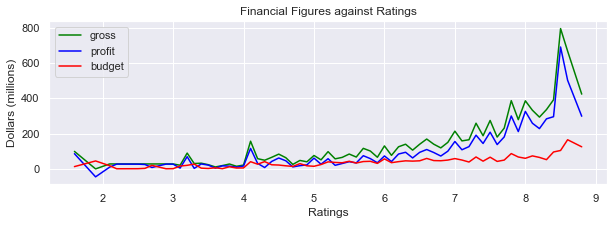

In [113]:
average_rating_vs_gross = imdb_budgets.groupby(['averagerating','primary_title']).agg({'worldwide_gross': 'mean'}).groupby('averagerating').mean()
average_rating_vs_budget = imdb_budgets.groupby(['averagerating','primary_title']).agg({'production_budget': 'mean'}).groupby('averagerating').mean()
average_rating_vs_return = imdb_budgets.groupby(['averagerating','primary_title']).agg({'production_return': 'mean'}).groupby('averagerating').mean()


fig, ax = plt.subplots(figsize = (10,3))

sns.lineplot(list(average_rating_vs_gross .to_dict()['worldwide_gross'].keys()), 
        list(average_rating_vs_gross ['worldwide_gross']),
        color = 'green',
        label = 'gross')

sns.lineplot(list(average_rating_vs_return.to_dict()['production_return'].keys()), 
        list(average_rating_vs_return['production_return']),
        color='blue',
        label='profit')

sns.lineplot(list(average_rating_vs_budget.to_dict()['production_budget'].keys()), 
        list(average_rating_vs_budget['production_budget']),
        color = 'red',
        label='budget')

ax.set_title('Financial Figures against Ratings')
ax.set_xlabel('Ratings')
ax.set_ylabel('Dollars (millions)');
sns.set()

#This will give us the correlation between the "profit" and ratings
np.corrcoef(list(average_rating_vs_return.to_dict()['production_return'].keys()),
            list(average_rating_vs_return['production_return']))[1][0]



### Analysis
We see little growth in profit for each point of rating gained between 0 to 6 points. However, after 6 points
profit begins to exponentially increase as ratings increase. 
Thus, at a minimum, we will require a director that can achieve 6 points on average.
Ideally, we'd also want to pick an industry that achieves a 6 point rating on average.

#### Now we shall examine the correlation between profit and ratings within the Mystery, Horror and Musical Genres

In [114]:
# Rename the crew_title_basics_ratings_name to 'imbd_joined' for ease of reference as it contains the most important imdb data
imdb_joined = crew_title_basics_ratings_name

In [115]:
# merge the these two databases to get ratings per movie
titles_and_ratings = imdb_title_basics.merge(imdb_title_ratings, left_on='tconst', right_on='tconst')

In [116]:
# Explode Genres column
titles_and_ratings = titles_and_ratings.explode('genres')

In [117]:
# Groupby genres to show their ratings and financial figures
genres_vs_rating_gross = pd.DataFrame(imdb_budgets.groupby(['genres', 'primary_title']).agg({'averagerating': 'mean', 'worldwide_gross': 'mean'}))

In [118]:
genres_vs_rating_gross.reset_index(inplace=True)

In [119]:
# Isolate the financial figures for each of the desired genres
genres_vs_rating_gross = genres_vs_rating_gross.loc[genres_vs_rating_gross['genres'].isin(['Musical', 'Mystery', 'Horror'])]


In [120]:
#imdb_joined.explode('genres')
imdb_joined['genres'] = imdb_joined['genres'].apply(lambda x: list(str(x).split(',')))
imdb_joined = imdb_joined.explode('genres')

In [121]:
# Group by year and genre to view the average ratings of each genre per year
rating_per_year = pd.DataFrame(imdb_joined.groupby(['start_year', 'genres'])['averagerating'].mean())
rating_per_year = rating_per_year.reset_index()

In [122]:
# We are only interested in these 3 genres
rating_per_year = rating_per_year[rating_per_year['genres'].isin(['Mystery', 'Musical', 'Horror'])]

In [123]:
# Group by year and genres to view their budgets per year
genres_budgets_per_year = pd.DataFrame(imdb_budgets.groupby(['start_year', 'genres']).agg({'production_budget': 'mean'})).reset_index()

# Isolate only the relevant genres
genres_budgets_per_year = genres_budgets_per_year[genres_budgets_per_year['genres'].isin(['Mystery', 'Musical', 'Horror'])]

### Visualise change in ratings per year per genre as a bar chart. Then visualise budgets per year per genre

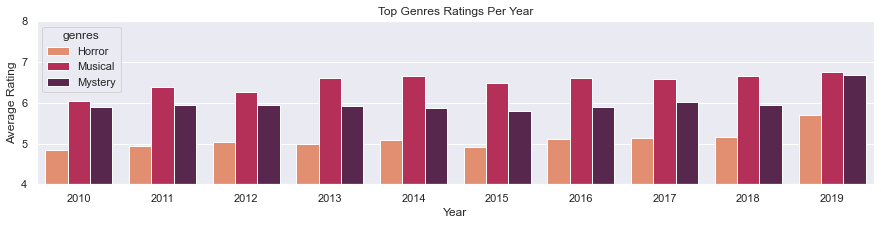

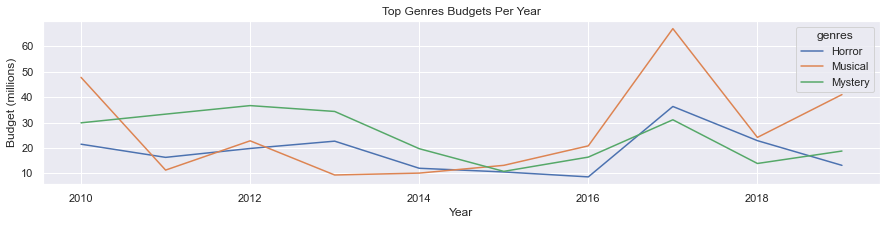

In [124]:
fig, ax1 = plt.subplots(figsize = (15,3))
palette = {'Mystery' : 'tab: red', 'Horror' : 'tab: cyan', 'Musical' : 'tab: purple'}
sns.barplot(x='start_year', 
            y='averagerating',
            color = [0.2, 0.2, 0.2],
            hue = 'genres',
            data = rating_per_year,
            palette = sns.color_palette('rocket_r', n_colors=3)
            )
ax1.set_ylim(4,8)
ax1.set_title('Top Genres Ratings Per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating')

fig, ax = plt.subplots(figsize = (15,3))
palette = {'Mystery' : 'tab: red', 'Horror' : 'tab: cyan', 'Musical' : 'tab: purple'}
sns.lineplot(x='start_year', 
            y='production_budget',
            color = [0.2, 0.2, 0.2],
            hue = 'genres',
            data = genres_budgets_per_year
            )

ax.set_title('Top Genres Budgets Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Budget (millions)');

In [126]:
imdb_genre_financials = pd.DataFrame(imdb_budgets.groupby(
                                                          ['genres', 
                                                           'primary_title']
                                                         ).agg({
                                                               'averagerating': 'mean', 
                                                               'worldwide_gross': 'mean',
                                                               'production_budget': 'mean',
                                                               'production_return': 'mean'})).reset_index()


In [127]:
# View the correlation between budget and ratings within each of the desired genres
imdb_genre_financials.groupby('genres')[['averagerating', 'production_budget']].corr()['averagerating'].loc[['Musical', 'Mystery', 'Horror'],'production_budget']


genres                    
Musical  production_budget    0.167739
Mystery  production_budget    0.405483
Horror   production_budget    0.269898
Name: averagerating, dtype: float64

## Examine the distributionbetween ratings and profit within each genre

In [128]:
directors_ratings = imdb_title_crew.merge(imdb_title_ratings, how='inner', left_on='tconst', right_on='tconst')

In [129]:
directors_name_ratings = imdb_name_basics.merge(directors_ratings, how='inner', left_on='nconst', right_on='nconst')

In [130]:
# Create variables of financial figures for each of the desired genres
imdb_bugets_musical = imdb_budgets[imdb_budgets['genres'].isin(['Musical'])]
imdb_budgets_horror = imdb_budgets[imdb_budgets['genres'].isin(['Horror'])]
imdb_budgets_mystery = imdb_budgets[imdb_budgets['genres'].isin(['Mystery'])]

### Visualise profit and budgets distribution per genre

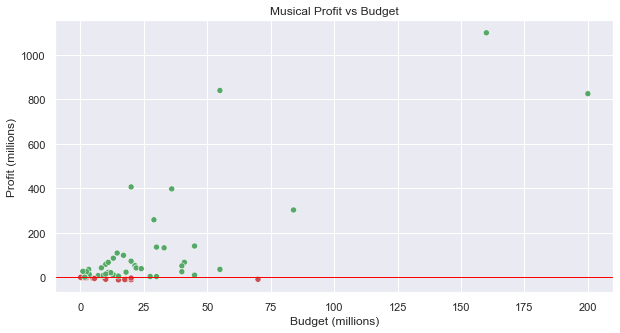

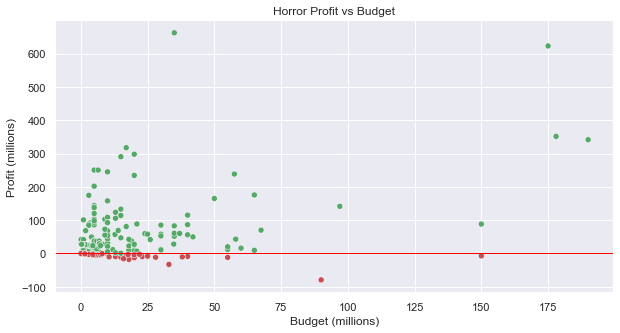

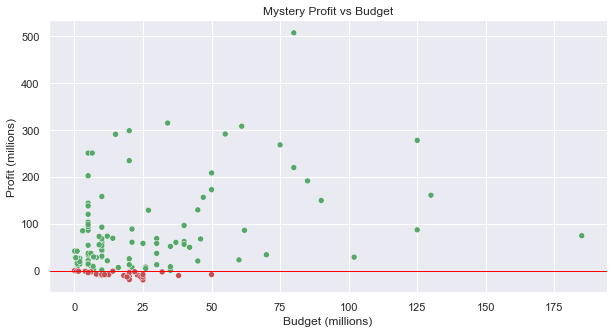

In [131]:
fig, ax = plt.subplots(figsize = (10,5))

col = np.where(imdb_bugets_musical['production_return']<0, 'r', 'g')
sns.scatterplot(y = 'production_return', 
                x ='production_budget',
                c=col,
                data = imdb_bugets_musical)

plt.axhline(0, color='red', linewidth=1)

ax.set_title('Musical Profit vs Budget')
ax.set_ylabel('Profit (millions)')
ax.set_xlabel('Budget (millions)')
plt.show();

fig, ax = plt.subplots(figsize = (10,5))

col = np.where(imdb_budgets_horror['production_return']<0, 'r', 'g')
sns.scatterplot(y = 'production_return', 
                x ='production_budget',
                c=col,
                data = imdb_budgets_horror)

plt.axhline(0, color='red', linewidth=1)

ax.set_title('Horror Profit vs Budget')
ax.set_ylabel('Profit (millions)')
ax.set_xlabel('Budget (millions)')
plt.show();

fig, ax = plt.subplots(figsize = (10,5))

col = np.where(imdb_budgets_mystery['production_return']<0, 'r', 'g')
sns.scatterplot(y = 'production_return', 
                x ='production_budget',
                c=col,
                data = imdb_budgets_mystery)

plt.axhline(0, color='red', linewidth=1)

ax.set_title('Mystery Profit vs Budget')
ax.set_ylabel('Profit (millions)')
ax.set_xlabel('Budget (millions)')
plt.show();





In [132]:
# Calculate the probability of profitable movie in each genre
musical_profitable_probability = (len(imdb_bugets_musical.loc[imdb_bugets_musical['production_return'] > 0]) / len(imdb_bugets_musical)) * 100
horror_profitable_probability = (len(imdb_budgets_horror.loc[imdb_budgets_horror['production_return'] > 0]) / len(imdb_budgets_horror)) * 100
mystery_profitable_probability = (len(imdb_budgets_mystery.loc[imdb_budgets_mystery['production_return'] > 0]) / len(imdb_budgets_mystery)) * 100


### Visualise the probability of distribution of profits within each genre

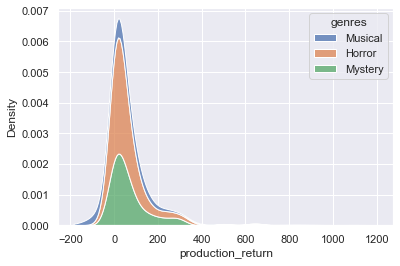

In [133]:
fig, ax = plt.subplots()
sns.kdeplot('production_return', 
            hue='genres', 
            data= imdb_budgets[imdb_budgets['genres'].isin(['Musical', 'Horror', 'Mystery'])],
           multiple = 'stack');


### Visualise the profit vs ratings per genre and isolate values above 6 ratings and profitable

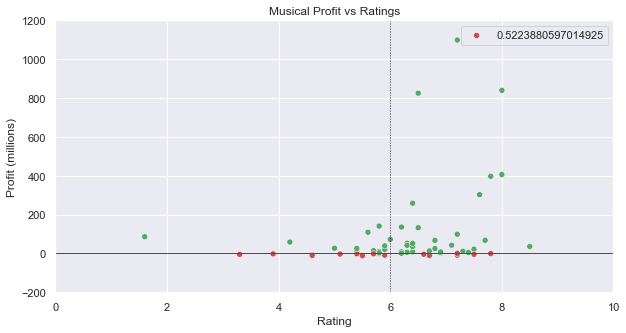

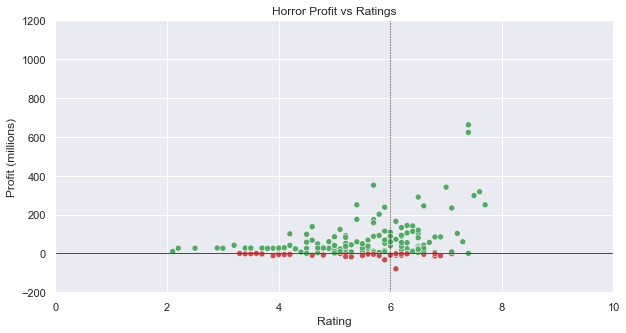

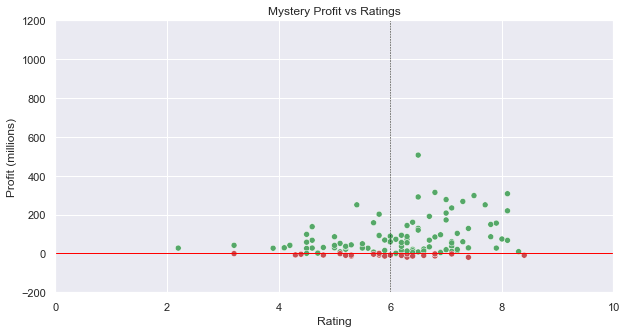

In [134]:
musical_probability = len(imdb_bugets_musical[(imdb_bugets_musical['averagerating'] >=6) & (imdb_bugets_musical['production_return'] > 0)]) / len(imdb_bugets_musical) 
horror_probability = len(imdb_budgets_horror[(imdb_budgets_horror['averagerating'] >=6) & (imdb_budgets_horror['production_return'] > 0)]) / len(imdb_budgets_horror) 
mystery_probability = len(imdb_budgets_mystery[(imdb_budgets_mystery['averagerating'] >=6) & (imdb_budgets_mystery['production_return'] > 0)]) / len(imdb_budgets_mystery) 

fig, ax = plt.subplots(figsize = (10,5))

col = np.where(imdb_bugets_musical['production_return']<0, 'r', 'g')
sns.scatterplot(y = 'production_return', 
                x ='averagerating',
                c=col,
                data = imdb_bugets_musical,
               label=musical_probability)

plt.axhline(0, color='red', linewidth=1)
plt.axvline(6, color='black', linewidth=0.5, ls='--')

ax.set_ylim(-200,1200)
ax.set_xlim(0,10)
ax.set_title('Musical Profit vs Ratings')
ax.set_ylabel('Profit (millions)')
ax.set_xlabel('Rating')
plt.show();

fig, ax = plt.subplots(figsize = (10,5))

col = np.where(imdb_budgets_horror['production_return']<0, 'r', 'g')
sns.scatterplot(y = 'production_return', 
                x ='averagerating',
                c=col,
                data = imdb_budgets_horror)

plt.axhline(0, color='red', linewidth=1)
plt.axvline(6, color='black', linewidth=0.5, ls='--')
ax.set_ylim(-200,1200)
ax.set_xlim(0,10)
ax.set_title('Horror Profit vs Ratings')
ax.set_ylabel('Profit (millions)')
ax.set_xlabel('Rating')
plt.show();

fig, ax = plt.subplots(figsize = (10,5))

col = np.where(imdb_budgets_mystery['production_return']<0, 'r', 'g')
sns.scatterplot(y = 'production_return', 
                x ='averagerating',
                c=col,
                data = imdb_budgets_mystery)

plt.axhline(0, color='red', linewidth=1)
plt.axvline(6, color='black', linewidth=0.5, ls='--')
ax.set_ylim(-200,1200)
ax.set_xlim(0,10)
ax.set_title('Mystery Profit vs Ratings')
ax.set_ylabel('Profit (millions)')
ax.set_xlabel('Rating')
plt.show();





In [135]:
musical_probability


0.5223880597014925

In [136]:
mystery_probability


0.5

In [54]:
horror_probability

0.30456852791878175

## Directors

In [ ]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [ ]:
# I want the principals- actor  compared to movie gross,  
# put name and year together to get the best fits
# Probably will need to transform actor to actress 

#Can I do one giant db?
#Includes name, tconst, nconst, job, and ROI
# I need tconst paired with name

#relevant db
#imdb_title_principals
#has tconst and directors and writers, no producers

imdb_name_basics
#only database that includes nconst and names
#use this to convert nconst into names
#only need nconst and primary_name

imdb_title_basics
#only db that has tconst and titles
#only need tconst and primary_title

imdb_title_crew
#has tconst and directors and writers, no producers
# can do an analysis of this to produce best writers and directors

imdb_title_principals
#has tconst, nconst and their role in the film- category may be more useful than job- lots of nulls
#only need tconst, nconst and category- take out characters and job, unclear what ordering does

tn_movies_budgets
#has budget and gross, will need to combine grosses, no tconst
#only need movie, convert budget and two grosses into ROI
# tried but got stuck

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [2]:
tn_movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
imdb_title_crew
#no changes needed

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


Ross notes: I am mreging the tables for box office budget, IMDB movies (tconst), director's code number (nconst), and director's name.

In [12]:
#hoang start here
title_roi = tn_movies_budgets
title_roi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,1400


In [46]:
#production budget how has extraneous characters stripped out and is an integer
title_roi["production_budget_clean"] = title_roi["production_budget"].str.replace("$","").str.replace(",","")
title_roi["production_budget_clean"] = pd.to_numeric(title_roi["production_budget_clean"])
title_roi

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1952/1384453333.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  title_roi["production_budget_clean"] = title_roi["production_budget"].str.replace("$","").str.replace(",","")


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean,worldwide_gross_clean,ROI,profit_margin
0,1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,6.532577,5.532577
1,2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,2.546673,1.546673
2,3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350,0.427892,-0.572108
3,4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963,4.243841,3.243841
4,5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747,4.153696,3.153696
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018,Red 11,"$7,000",$0,$0,7000,0,0.000000,-1.000000
5778,79,1999,Following,"$6,000","$48,482","$240,495",6000,240495,40.082500,39.082500
5779,80,2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338,0.267600,-0.732400
5780,81,2015,A Plague So Pleasant,"$1,400",$0,$0,1400,0,0.000000,-1.000000


In [47]:
#turning strings into 
#title_roi_raw["worldwide_gross_clean"] = title_roi_raw["worldwide_gross"].str.replace("$","").str.replace(",","")
#title_roi_raw["worldwide_gross_clean"] = pd.to_numeric(title_roi_raw["worldwide_gross_clean"])

In [14]:
#gross now an integer
title_roi["worldwide_gross_clean"] = title_roi["worldwide_gross"].str.replace("$","").str.replace(",","")
title_roi["worldwide_gross_clean"] = pd.to_numeric(title_roi["worldwide_gross_clean"])
title_roi

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1952/2851010953.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  title_roi["worldwide_gross_clean"] = title_roi["worldwide_gross"].str.replace("$","").str.replace(",","")


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean,worldwide_gross_clean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,7000,0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,1400,0


In [15]:
#title_roi["ROI"] = title_roi["worldwide_gross_clean"]/ title_roi["production_budget_clean"]
#title_roi
#my method is different from colleagues so commenting out

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean,worldwide_gross_clean,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747,4.153696
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,7000,0,0.000000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000,240495,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,1400,0,0.000000


In [16]:
#title_roi["profit_margin"] = (title_roi["worldwide_gross_clean"]- title_roi["production_budget_clean"]) / title_roi["production_budget_clean"]
#title_roi["profit_margin"].sort_values()

5712      -1.000000
5753      -1.000000
2754      -1.000000
5318      -1.000000
5319      -1.000000
           ...     
5406     412.833333
5679     415.564740
5492     430.517853
5613     497.750000
5745    1799.000000
Name: profit_margin, Length: 5782, dtype: float64

Testing the industry as a whole based on the return on investment

In [ ]:
total_profit = (title_roi["worldwide_gross_clean"].sum()-title_roi["production_budget_clean"].sum()) / title_roi["production_budget_clean"].sum()
total_profit
#my number looks different than Ferits

1.896294935627204

In [ ]:
Below converts the year to an integer which allows the merge

In [21]:
title_roi["release_date"] = title_roi["release_date"].apply(lambda x: x[-4:])
#finds the release date

In [22]:
#makes it an integer
title_roi["release_date"] = title_roi["release_date"].astype(int)

In [48]:
#merge title and revenue
#imdb_title_basics.merge(title_roi, left_on = ["primary_title", "start_year"], right_on = ["movie", "release_date"])


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean,worldwide_gross_clean,ROI,profit_margin
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012,Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,0.001638,-0.998362
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,2013,The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",91000000,187861183,2.064409,1.064409
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,2014,A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",28000000,62108587,2.218164,1.218164
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,7.669092,6.669092
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,2011,The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",45000000,21544732,0.478772,-0.521228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",16,2019,Crawl,"$17,000,000",$0,$0,17000000,0,0.000000,-1.000000
1543,tt8408152,Detention,Detention,2012,NaN,Horror,45,2012,Detention,"$10,000,000",$0,$0,10000000,0,0.000000,-1.000000
1544,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,2018,Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",5000000,6653715,1.330743,0.330743
1545,tt8852552,Icarus,Icarus,2010,78.0,Thriller,91,2010,Icarus,"$6,000,000",$0,$0,6000000,0,0.000000,-1.000000


Merging IMDB and box office databases

In [49]:
imdb_basics_roi = imdb_title_basics.merge(title_roi, left_on = ["primary_title", "start_year"], right_on = ["movie", "release_date"])
imdb_basics_roi

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean,worldwide_gross_clean,ROI,profit_margin
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012,Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,0.001638,-0.998362
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,2013,The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",91000000,187861183,2.064409,1.064409
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,2014,A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",28000000,62108587,2.218164,1.218164
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,2015,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,7.669092,6.669092
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,2011,The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",45000000,21544732,0.478772,-0.521228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",16,2019,Crawl,"$17,000,000",$0,$0,17000000,0,0.000000,-1.000000
1543,tt8408152,Detention,Detention,2012,NaN,Horror,45,2012,Detention,"$10,000,000",$0,$0,10000000,0,0.000000,-1.000000
1544,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,2018,Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",5000000,6653715,1.330743,0.330743
1545,tt8852552,Icarus,Icarus,2010,78.0,Thriller,91,2010,Icarus,"$6,000,000",$0,$0,6000000,0,0.000000,-1.000000


In [25]:
#only displaying
#imdb_basics_roi.sort_values(by=["ROI"], ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_clean,worldwide_gross_clean,ROI,profit_margin
969,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",80,2015,The Gallows,"$100,000","$22,764,410","$41,656,474",100000,41656474,416.564740,415.564740
502,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,12,2012,The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",1000000,101759490,101.759490,100.759490
485,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,65,2010,Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032",3000000,177512032,59.170677,58.170677
1431,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",49,2017,Get Out,"$5,000,000","$176,040,665","$255,367,951",5000000,255367951,51.073590,50.073590
1423,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,64,2016,Moonlight,"$1,500,000","$27,854,931","$65,245,512",1500000,65245512,43.497008,42.497008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,tt1085492,The Prince,The Prince,2014,93.0,"Action,Thriller",53,2014,The Prince,"$18,000,000",$0,$0,18000000,0,0.000000,-1.000000
1288,tt3781616,Checkmate,Checkmate,2015,102.0,"Action,Crime,Thriller",17,2015,Checkmate,"$1,500,000",$0,$0,1500000,0,0.000000,-1.000000
1029,tt2414822,The Perfect Wave,The Perfect Wave,2014,94.0,"Adventure,Biography,Drama",65,2014,The Perfect Wave,"$4,000,000",$0,$0,4000000,0,0.000000,-1.000000
1304,tt3864056,The Goldfinch,The Goldfinch,2019,NaN,Drama,43,2019,The Goldfinch,"$40,000,000",$0,$0,40000000,0,0.000000,-1.000000


This is to marge the director datasets into the box office information. Directors was exploded because certain movies have two directors. This results in roughly 150 more movies- some movies will be shown twice at this point.

In [50]:
imdb_directors = imdb_basics_roi.merge(imdb_title_crew, left_on = "tconst", right_on = "tconst")
imdb_directors.shape

(1547, 18)

In [51]:
imdb_directors["directors"] = imdb_directors["directors"].map(lambda x : str(x).split(","))

In [28]:
imdb_directors_ex = imdb_directors.explode("directors")
#inplace = True
imdb_directors_ex.shape

(1707, 18)

In [29]:
#imdb_directors
#imdb_title_basics.merge(title_roi, left_on = ["primary_title", "start_year"], right_on = ["movie", "release_date"])
imdb_directors_names = imdb_directors_ex.merge(imdb_name_basics, left_on = "directors", right_on = "nconst", how = "left")
imdb_directors_names.shape
#Has directors and their name
#left table dominates

(1707, 24)

In [30]:
imdb_directors_sorted_roi = imdb_directors_names.groupby(['primary_name'])["ROI"].mean().sort_values(ascending = False)

#sorts directors by profitability and roi
#do pivot table with the top 5 directors/ genre
# music, horror, mystery 

This is to sort the directors by the mean profitability of their movies within this database

In [31]:
imdb_directors_sorted_roi = imdb_directors_names.groupby(["genres", 'primary_name'])["ROI"].mean().sort_values(ascending = False)
imdb_directors_sorted_roi.head(5)


genres                   primary_name      
Horror,Mystery,Thriller  Travis Cluff          416.564740
                         Chris Lofing          416.564740
Horror                   William Brent Bell    101.759490
                         Tod Williams           59.170677
Drama                    Barry Jenkins          43.497008
Name: ROI, dtype: float64

Worldwide gross was changed to exclude low grossing movies which are not representative of the industry as a whole because they can be made with virtually no budget and then have massive profitability.

Many calculations below are exploratory.

I also changed profitability to match with the rest of my group. The formula went from gross/ budget to (gross - budget)/ budget which basically was a -1. An ROI of 6 becomes a profitability of 5. Many of the marked out cells are along this line.

In [32]:
imdb_directors_high_gross = imdb_directors_names[imdb_directors_names["worldwide_gross_clean"] >= 50000000]
#this screens out the small grossing movies

Null values were stripped out because some calculations are not available if there is even one null value. Very little data was removed.

In [33]:
imdb_directors_high_gross_notna = imdb_directors_high_gross[imdb_directors_high_gross["genres"].notna()]

I looked for highest grossing directors in each genre. These are dominated by horror, which has high variability, so I did a search function for music in genre to include the top music directors. Since it is "contains" it will also find Musical as well.

In [35]:
#Music directors were hard to find so searched for them
imdb_directors_high_gross_notna[imdb_directors_high_gross_notna["genres"].str.contains("Music")].groupby(["genres", 'primary_name'])["ROI"].mean().sort_values(ascending = False).head(20)

genres                       primary_name       
Comedy,Drama,Music           Damien Chazelle        21.317558
Biography,Drama,Music        Bryan Singer           16.272461
Comedy,Music                 Elizabeth Banks         9.918120
Comedy,Drama,Music           Gregory Jacobs          8.528317
Family,Fantasy,Musical       Bill Condon             7.869998
Documentary,Music            Jon M. Chu              7.618010
Drama,Fantasy,Music          R.J. Cutler             7.123288
Comedy,Music,Romance         Jason Moore             6.826138
Comedy,Drama,Musical         Ayan Mukherjee          6.123791
Drama,Music,Romance          Jon M. Chu              5.529637
Fantasy,Musical              James Fotopoulos        5.127456
Drama,Music,Romance          Scott Speer             5.016736
                             Julie Anne Robinson     4.633947
Biography,Drama,Musical      Michael Gracey          4.603161
Comedy,Music                 Trish Sie               4.127476
Biography,Documentary

## Facebook Likes vs. Gross

In [ ]:
#Imdb dataset
imdb_title_basics = pd.read_csv('data/title.basics.csv')
imdb_title_akas = pd.read_csv('data/title.akas.csv')
imdb_title_crew = pd.read_csv('data/title.crew.csv')
imdb_title_principals = pd.read_csv('data/title.principals.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
imdb_title_ratings = pd.read_csv('data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [9]:
#Import Data off different dataset. Taken from Kaggle called IMDB 5000 Movie Dataset.
metadeta = pd.read_csv('data/movie_metadata.csv')

In [10]:
#Examine what datamframe to see what it looks like
metadeta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
#See if there are any null values and types
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [12]:
#Drop NA values
metadeta = metadeta[metadeta['gross'].notna()]

In [13]:
#Facebook launched around 2004, set dataframe to movie titles that were released after 2004
metadeta = metadeta[metadeta['title_year'] > 2004]

In [14]:
#Double checking to see minimum year
metadeta.min()

C:\Users\01aut\AppData\Local\Temp/ipykernel_17024/1380351631.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metadeta.min()


director_name                                                  Aaron Schneider
num_critic_for_reviews                                                     1.0
duration                                                                  41.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                     0.0
actor_1_facebook_likes                                                     0.0
gross                                                                    162.0
genres                                                                  Action
movie_title                                               10 Cloverfield Lane 
num_voted_users                                                             22
cast_total_facebook_likes                                                    0
facenumber_in_poster                                                       0.0
movie_imdb_link              http://www.imdb.com/tit

In [15]:
metadeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 5041
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2154 non-null   object 
 1   director_name              2156 non-null   object 
 2   num_critic_for_reviews     2154 non-null   float64
 3   duration                   2154 non-null   float64
 4   director_facebook_likes    2156 non-null   float64
 5   actor_3_facebook_likes     2149 non-null   float64
 6   actor_2_name               2152 non-null   object 
 7   actor_1_facebook_likes     2154 non-null   float64
 8   gross                      2156 non-null   float64
 9   genres                     2156 non-null   object 
 10  actor_1_name               2154 non-null   object 
 11  movie_title                2156 non-null   object 
 12  num_voted_users            2156 non-null   int64  
 13  cast_total_facebook_likes  2156 non-null   int64

In [16]:
#checking correlation coefficient between the values
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [17]:
#There are alot of categories of facebook likes, lets see what they looked like combined
metadeta['combined_likes_movie'] = metadeta['actor_2_facebook_likes'] + metadeta['actor_1_facebook_likes'] +  metadeta['actor_3_facebook_likes'] + metadeta['director_facebook_likes'] +  metadeta['movie_facebook_likes'] + metadeta['cast_total_facebook_likes'] 

In [18]:
#Lets check the correlation coefficient, we can see that when all facebook likes are combined it produces a strong correlation coefficient
metadeta.corr()["gross"].sort_values()

facenumber_in_poster        -0.024948
aspect_ratio                 0.036908
budget                       0.099176
title_year                   0.119689
director_facebook_likes      0.174836
imdb_score                   0.197884
actor_1_facebook_likes       0.199291
actor_2_facebook_likes       0.299579
cast_total_facebook_likes    0.318170
duration                     0.324626
actor_3_facebook_likes       0.362785
movie_facebook_likes         0.455585
combined_likes_movie         0.465892
num_critic_for_reviews       0.557206
num_user_for_reviews         0.628843
num_voted_users              0.698520
gross                        1.000000
Name: gross, dtype: float64

In [19]:
#Let's break up everything by Genre now, formatting has to be right
metadeta['genres'] = metadeta['genres'].map(lambda x : x.replace("|", " ")) 
metadeta['genres'] = metadeta['genres'].map(lambda x : x.split())

In [20]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,94913.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,108254.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,365759.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,28150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,"[Comedy, Drama, Romance]",...,English,USA,R,15000.0,2005.0,224.0,6.6,NaN,297,2582.0
5023,Color,Daryl Wein,22.0,88.0,38.0,211.0,Heather Burns,331.0,76382.0,[Romance],...,English,USA,NaN,15000.0,2009.0,212.0,6.2,2.35,324,2662.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,[Thriller],...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,74.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,"[Comedy, Drama]",...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0


In [21]:
#Explode will let us split them up
metadeta = metadeta.explode('genres')

In [24]:
metadeta

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_likes_movie
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Adventure,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Fantasy,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,40625.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,94913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,1737.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,5200.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Drama,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,5200.0


In [26]:
#There are two seperate Music and Musical genre. They are similar enough to condense into one column.
metadeta['genres'] = metadeta['genres'].map(lambda x: "Musical" if x == "Music" else x)

In [27]:
#Setting up plot legend and labels for better data visualization
metadeta.rename(columns={'genres': 'Genres'}, inplace = True)
metadeta['gross_adjusted'] = metadeta['gross'] / 1000000
metadeta['combined_likes_movie_adjusted'] = metadeta['combined_likes_movie'] / 1000

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


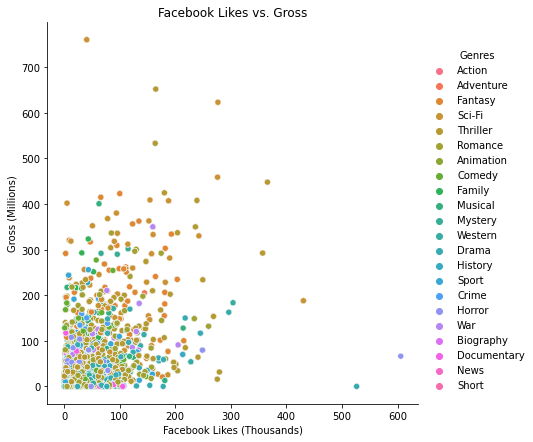

In [29]:
#Plotting with SNS by genre
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta, 
hue="Genres", size=6)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)');



In [30]:
#Lets now only look at the 3 genres we are interested in
metadeta_top3 = metadeta[(metadeta['Genres'] == 'Horror') | (metadeta['Genres'] == 'Mystery') | (metadeta['Genres'] == 'Musical')]

C:\Users\01aut\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


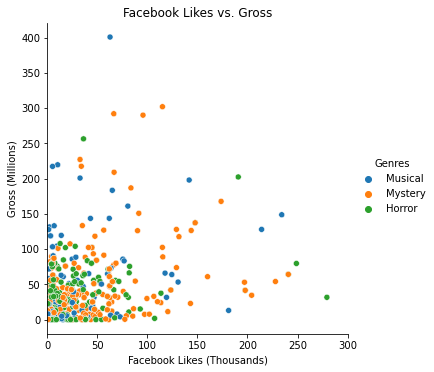

In [31]:
#Plotting the only 3 genres, limited x to 300 to get a good grasp without outliers
sns.pairplot(x_vars= ['combined_likes_movie_adjusted'], y_vars=["gross_adjusted"], data= metadeta_top3, 
hue="Genres", size=5)

plt.title('Facebook Likes vs. Gross')
plt.xlabel('Facebook Likes (Thousands)')
plt.ylabel('Gross (Millions)')
plt.xlim(0, 300);

In [32]:
#Checking the correlation between gross and combined likes movies under genres
metadeta.groupby('Genres')[["combined_likes_movie", "gross"]].corr()["gross"].loc[:,"combined_likes_movie"].sort_values()

Genres
Documentary    0.079296
Sport          0.205754
Horror         0.274817
Mystery        0.317863
Musical        0.321736
Animation      0.323789
Comedy         0.334132
Crime          0.431754
Romance        0.440537
Biography      0.463471
Drama          0.466650
Family         0.477682
Fantasy        0.487128
Action         0.487605
Adventure      0.526538
Thriller       0.536642
Sci-Fi         0.543116
History        0.629724
War            0.684955
Western        0.829149
News                NaN
Short               NaN
Name: gross, dtype: float64

In [33]:
#Checking the movie likes in each genre
metadeta.groupby('Genres').sum().loc[:,"combined_likes_movie"].sort_values( ascending = False)

Genres
Drama          42565102.0
Action         27662055.0
Thriller       26982409.0
Adventure      25829685.0
Comedy         24846521.0
Sci-Fi         16157498.0
Romance        16051586.0
Fantasy        14956100.0
Crime          14190906.0
Family          9894327.0
Mystery         8965901.0
Biography       6983713.0
Horror          6670355.0
Animation       4661824.0
Musical         3553761.0
History         3212747.0
War             2990686.0
Sport           2589418.0
Western         1553688.0
Documentary      570876.0
News              15318.0
Short                 0.0
Name: combined_likes_movie, dtype: float64